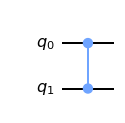

In [3]:
from qiskit import QuantumCircuit 

oracle = QuantumCircuit(2)
oracle.cz(0,1)
oracle.draw()

In [5]:
def display_unitary(qc, prefix=""):
    """Simulates a simple circuit and display its matrix representation.
    Args:
        qc (QuantumCircuit): The circuit to compile to a unitary matrix
        prefix (str): Optional LaTeX to be displayed before the matrix
    Returns:
        None (displays matrix as side effect)
    """
    from qiskit import Aer
    from qiskit.visualization import array_to_latex
    sim = Aer.get_backend('aer_simulator')
    # Next, we'll create a copy of the circuit and work on
    # that so we don't change anything as a side effect
    qc = qc.copy()
    # Tell the simulator to save the unitary matrix of this circuit
    qc.save_unitary()
    unitary = sim.run(qc).result().get_unitary()
    display(array_to_latex(unitary, prefix=prefix))

display_unitary(oracle, "U_\\text{oracle}=")

<IPython.core.display.Latex object>

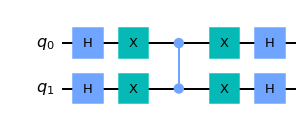

In [8]:
diffuser = QuantumCircuit(2)
diffuser.h([0,1])
diffuser.x([0,1])
diffuser.cz(0,1)
diffuser.x([0,1])
diffuser.h([0,1])
diffuser.draw()

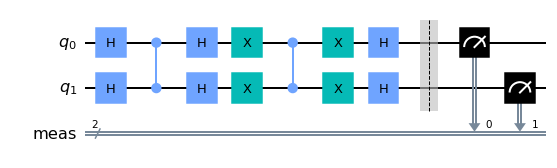

In [9]:
grover = QuantumCircuit(2)
grover.h([0,1])
grover = grover.compose(oracle)
grover = grover.compose(diffuser)
grover.measure_all()
grover.draw()

In [10]:
from qiskit import Aer 
sim = Aer.get_backend('aer_simulator')
sim.run(grover).result().get_counts()

{'11': 1024}

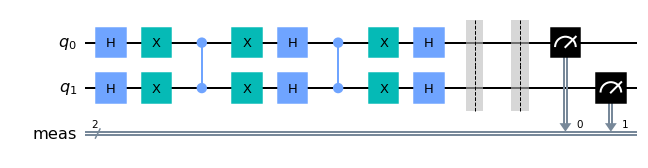

{'11': 1024}

In [7]:
from qiskit import QuantumCircuit
from qiskit import Aer

sim = Aer.get_backend('aer_simulator')

diffuser = QuantumCircuit(2)
diffuser.h([0,1])
diffuser.x([0,1])
diffuser.cz(0,1)
diffuser.x([0,1])
diffuser.h([0,1])
diffuser.cz(0,1)
diffuser.x([0,1])
diffuser.h([0,1])
diffuser.barrier()

diffuser.measure_all()
display(diffuser.draw())

sim.run(diffuser).result().get_counts()